<a href="https://colab.research.google.com/github/asbhupendra/24122020/blob/branch-002/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
path = '/content/sample_data/california_housing_test.csv'

In [5]:
pwd

'/content'

In [6]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [27]:
class Perceptron:
  def __init__(self, eta, epochs, activationFunction):
    self.weights = np.random.randn(3) * 1e-4
    print(f"self.weights: {self.weights}")
    self.eta = eta
    self.epochs = epochs
    self.activationFunction = activationFunction

  def fit(self, X, y):
    self.X = X
    self.y = y

    X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))] # concactination
    print(f"X_with_bias: \n{X_with_bias}")

    for epoch in range(self.epochs):
      print(f"for epoch: {epoch}")
      y_hat = self.activationFunction(X_with_bias, self.weights)
      print(f"predicted value: \n{y_hat}")
      error = self.y - y_hat
      print(f"error: \n{error}")
      self.weights = self.weights + self.eta * np.dot(X_with_bias.T, error)
      print(f"updated weights: \n{self.weights}")
      print("#############\n")

  def predict(self, X):
    X_with_bias = np.c_[X, -np.ones((len(self.X), 1))]
    return self.activationFunction(X_with_bias, self.weights)


In [28]:
activationFunction = lambda inputs, weights: np.where(np.dot(inputs,weights)>0,1,0)

In [8]:
def activationFunction(inputs,weights):
  z = np.dot(inputs,weights)
  if z>0:
    y_hat = 1
  else:
    y_hat = 0
  return y_hat

In [9]:
def activationFunction(inputs,weights):
  z = np.dot(inputs,weights)
  y_hat = np.where(z>0,1,0)  
  return y_hat

In [11]:
# AND

In [12]:
data = {'x1':[0,0,1,1],'x2':[0,1,0,1],'y':[0,0,0,1]}
AND = pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [13]:
X = AND.drop('y',axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [16]:
y = AND['y']
y.to_frame()


,y
0,0
1,0
2,0
3,1


In [33]:
model = Perceptron(eta = 1,epochs = 10,activationFunction=activationFunction)

self.weights: [ 1.87296812e-05  2.62611627e-06 -1.21829302e-04]


In [34]:
model.fit(X,y)

X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights: 
[-0.99998127 -0.99999737  2.99987817]
#############

for epoch: 1
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[1.87296812e-05 2.62611627e-06 1.99987817e+00]
#############

for epoch: 2
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[1.00001873 1.00000263 0.99987817]
#############

for epoch: 3
predicted value: 
[0 1 1 1]
error: 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights: 
[1.87296812e-05 2.62611627e-06 2.99987817e+00]
#############

for epoch: 4
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[1.00001873 1.00000263 1.99987817]
#############

for epoch: 5
predicted value: 
[0 0 0 1]
error: 
0    0
1    0


In [35]:
data = {'x1':[0,0,1,1],'x2':[0,1,0,1],'y':[0,1,1,1]}
OR = pd.DataFrame(data)
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [36]:
data = {'x1':[0,0,1,1],'x2':[0,1,0,1],'y':[0,1,1,1]}
OR = pd.DataFrame(data)
X = OR.drop('y',axis=1)
y = OR['y']


In [37]:
model_or = Perceptron(eta = 1,epochs = 10,activationFunction=activationFunction)

self.weights: [-4.35477159e-05 -4.46880361e-05  1.01426980e-04]


In [38]:
model_or.fit(X,y)

X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights: 
[ 1.99995645  1.99995531 -2.99989857]
#############

for epoch: 1
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[ 1.99995645  1.99995531 -1.99989857]
#############

for epoch: 2
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[ 1.99995645  1.99995531 -0.99989857]
#############

for epoch: 3
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[1.99995645e+00 1.99995531e+00 1.01426980e-04]
#############

for epoch: 4
predicted value: 
[0 1 1 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[1.99995645e+00 1.99995531e+00 1.01426980e-04]
#############

for epoch: 5
predicted value: 
[0 1 1 1]
error: 
0    0
1

In [39]:
# XOR

In [40]:
data = {'x1':[0,0,1,1],'x2':[0,1,0,1],'y':[0,1,1,0]}
XOR = pd.DataFrame(data)
X = XOR.drop('y',axis=1)
y = XOR['y']


In [41]:
model_xor = Perceptron(eta = 0.01,epochs = 10,activationFunction=activationFunction)

self.weights: [1.09861663e-04 9.61953676e-05 3.85511089e-05]


In [42]:
model_xor.fit(X,y)

X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[0 1 1 1]
error: 
0    0
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-0.00989014 -0.0099038   0.01003855]
#############

for epoch: 1
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 1.09861663e-04  9.61953676e-05 -9.96144889e-03]
#############

for epoch: 2
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-0.00989014 -0.0099038   0.01003855]
#############

for epoch: 3
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 1.09861663e-04  9.61953676e-05 -9.96144889e-03]
#############

for epoch: 4
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-0.00989014 -0.0099038   0.01003855]
#############

for epoch: 5
predicted value: 
[0 0 0 0]
error: 
0 

In [43]:
model_xor.predict(X)

array([1, 1, 1, 1])

In [44]:
model.predict(X)

array([0, 0, 0, 1])

In [45]:
model_or.predict(X)

array([0, 1, 1, 1])

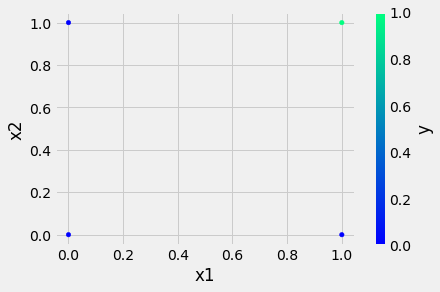

In [48]:
AND.plot(kind='scatter',x='x1',y='x2',c='y',cmap='winter')

In [51]:
# XOR

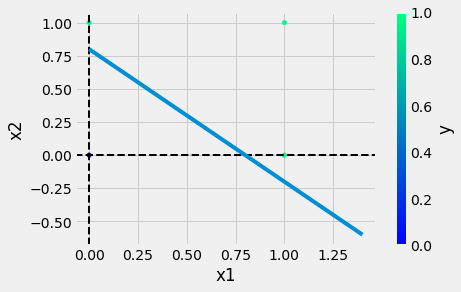

In [60]:
OR.plot(kind='scatter',x='x1',y='x2',c='y',cmap='winter')
plt.axhline(y=0, color = 'black',linestyle = "--",linewidth=2)
plt.axvline(x=0, color = 'black',linestyle = "--",linewidth=2)
plt.plot(np.linspace(0,1.4), 0.8 -1*(np.linspace(0,1.4)) )

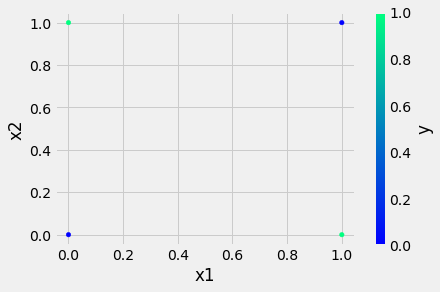

In [50]:
XOR.plot(kind='scatter',x='x1',y='x2',c='y',cmap='winter')

In [53]:
np.random.randint(5,10,6)

array([5, 9, 8, 5, 9, 7])

In [56]:
np.linspace(5,10,5).1

SyntaxError: ignored